In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.utils import shuffle

df=pd.read_csv('C:/Users/plays/Hospital_project/ver_2_imputated_selected.csv')
df['Beat'].fillna('NA', inplace=True)

df_pos=df[df['Status']==1]
df_neg=df[df['Status']==0]

#Status==negative 데이터를 무작위로 섞습니다.
df_neg_shuffle = shuffle(df_neg, random_state = 73510)
print(df_neg_shuffle)

df_neg1=df_neg_shuffle.iloc[0:75]
df_neg2=df_neg_shuffle.iloc[75:148]
df_neg3=df_neg_shuffle.iloc[148:216]
df_neg4=df_neg_shuffle.iloc[216:284]
df_neg5=df_neg_shuffle.iloc[284:361]

df1=pd.concat([df_pos,df_neg1])
df2=pd.concat([df_pos,df_neg2])
df3=pd.concat([df_pos,df_neg3])
df4=pd.concat([df_pos,df_neg4])
df5=pd.concat([df_pos,df_neg5])

def labelencoder(df):                                    
    for c in df.columns:                                      
        if df[c].dtype=='object': 
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

def get_boolean(x):
  value=''
  if x==0: value=False
  elif x==1: value=True
  return value

scaler=MinMaxScaler()

for i in range(1,6):
  globals()['feature'+str(i)]=globals()['df'+str(i)].drop(['Temp_No','Cancer.1','Status','Dur_Event_day','Dur_Censored_day'],axis=1)
  globals()['feature'+str(i)]=labelencoder(globals()['feature'+str(i)])  
  globals()['feature'+str(i)]=abs(globals()['feature'+str(i)])

  ft=scaler.fit_transform(globals()['feature'+str(i)])
  globals()['feature'+str(i)]=pd.DataFrame(ft, columns=globals()['feature'+str(i)].columns)
  
  globals()['label'+str(i)]=globals()['df'+str(i)][['Status','Dur_Event_day','Dur_Censored_day']]
  globals()['label'+str(i)]['Status']=globals()['label'+str(i)]['Status'].apply(lambda x: get_boolean(x))
  globals()['label'+str(i)]['Dur_Event_day'].fillna(0,inplace=True)
  globals()['label'+str(i)]['Dur_Censored_day'].fillna(0,inplace=True)

  globals()['clf_label'+str(i)]=globals()['df'+str(i)][['Status']]
  globals()['label'+str(i)]['Duration']=globals()['label'+str(i)]['Dur_Censored_day']+globals()['label'+str(i)]['Dur_Event_day']
  globals()['label'+str(i)].drop(['Dur_Event_day','Dur_Censored_day'],axis=1, inplace=True)
  
  status=list(globals()['label'+str(i)]['Status'].values)
  duration=list(globals()['label'+str(i)]['Duration'].values.astype(int))
  globals()['st_label'+str(i)]=np.array([(status[0],duration[0])], dtype=[('Status','?'),('Duration','<f8')])
  for c in range(1,len(globals()['label'+str(i)].index)):
    lbl=np.array([(status[c],duration[c])], dtype=[('Status','?'),('Duration','<f8')])
    globals()['st_label'+str(i)]=np.append(globals()['st_label'+str(i)],lbl,axis=0)

     Temp_No  Age  Sex  Cancer  Etiology  AF_composite  PFO_positive  \
394      395   61    1       0         7             0             1   
368      369   56    1       0         7             0             0   
245      246   64    1       0         2             1             0   
312      313   76    0       0         7             0             0   
401      402   21    1       0         4             0             1   
..       ...  ...  ...     ...       ...           ...           ...   
130      131   67    0       0         7             0             1   
387      388   70    1       1         7             0             0   
417      418   34    1       0         7             0             1   
304      305   55    0       0         7             0             1   
15        16   83    0       0         7             0             1   

         size  Amt_TEE  High_risk_PFO  ... RoPE_score  RoPE_score_5_scale  \
394  2.250344        2              0  ...          6     

#**RandomForestClassifier**

report: 
               precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30

zero_one_loss: 0.43333333333333335
log_loss 14.967042983690355
report: 
               precision    recall  f1-score   support

           0       1.00      0.54      0.70        28
           1       0.07      1.00      0.13         1

    accuracy                           0.55        29
   macro avg       0.54      0.77      0.42        29
weighted avg       0.97      0.55      0.68        29

zero_one_loss: 0.4482758620689655
log_loss 15.483258203463153
report: 
               precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.64      0.53      0.58        17

    accuracy               

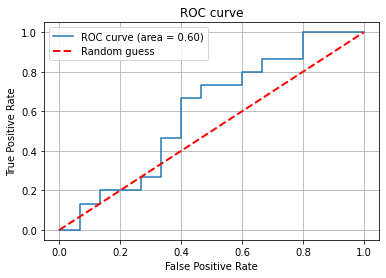

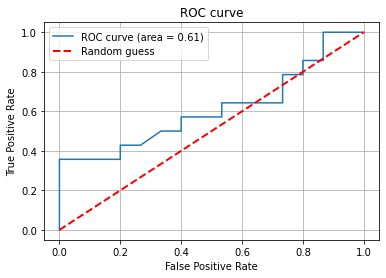

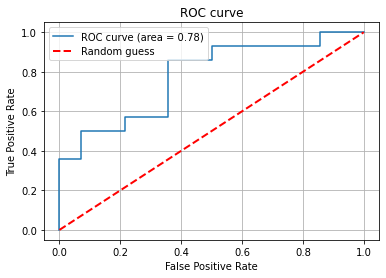

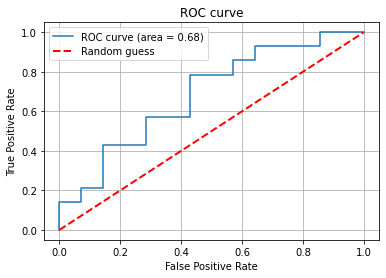

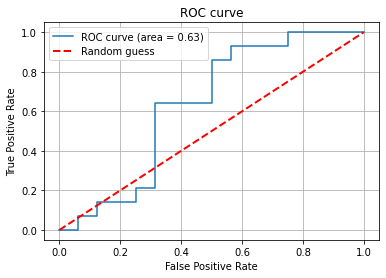

In [115]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE,BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import log_loss,zero_one_loss
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.simplefilter('ignore')

rfc=RandomForestClassifier(n_estimators=500, random_state=10, max_depth=5,class_weight='balanced')
smote=SMOTEENN(random_state=50)
X_train,X_test,y_train,y_test=train_test_split(feature2,clf_label2,stratify=clf_label2,test_size=0.2,random_state=20)
x_re,y_re=smote.fit_resample(X_train,y_train)

for i in range(1,6):
    globals()['X_train'+str(i)],globals()['X_test'+str(i)],globals()['y_train'+str(i)],globals()['y_test'+str(i)]=train_test_split(globals()['feature'+str(i)], globals()['clf_label'+str(i)],stratify= globals()['clf_label'+str(i)],test_size=0.2,random_state=20)
    
    globals()['x_re'+str(i)], globals()['y_re'+str(i)]=smote.fit_resample( globals()['X_train'+str(i)], globals()['y_train'+str(i)])
    rfc.fit(globals()['x_re'+str(i)],globals()['y_re'+str(i)])
    globals()['pred'+str(i)]=rfc.predict(globals()['X_test'+str(i)])
    globals()['report'+str(i)]=classification_report(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print('report: \n',globals()['report'+str(i)])
    globals()['zero_one'+str(i)]=zero_one_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)],normalize=True)
    print('zero_one_loss:',globals()['zero_one'+str(i)])
    globals()['loss'+str(i)]=log_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print('log_loss',globals()['loss'+str(i)])
    
from sklearn.metrics import roc_curve
from sklearn import metrics

for i in range(1,6):
    globals()['pred_proba'+str(i)] = rfc.predict_proba(globals()['X_test'+str(i)])
    print(globals()['pred_proba'+str(i)][1:10,])
    
for i in range(1,6):
    globals()['fpr'+str(i)], globals()['tpr'+str(i)], globals()['thresh'+str(i)] = roc_curve(globals()['y_test'+str(i)], globals()['pred_proba'+str(i)][:,1])
    globals()['auc'+str(i)] = metrics.auc(globals()['fpr'+str(i)],  globals()['tpr'+str(i)])
    print("AUC:", globals()['auc'+str(i)])
    
for i in range(1,6):
    plt.plot(globals()['fpr'+str(i)], globals()['tpr'+str(i)],label='ROC curve (area = %.2f)' %globals()['auc'+str(i)])
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='best')
    plt.show()

**XGBClassifier**

[23:20:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "num_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:20:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.60      0.45      0.51        20
           1       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30

0.5666666666666667
19.57226647617379
[23:20:50] WARNING: ..\

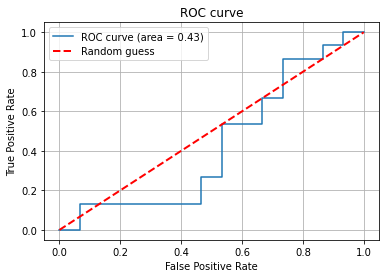

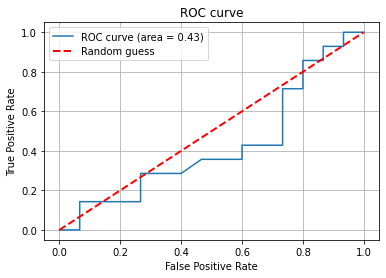

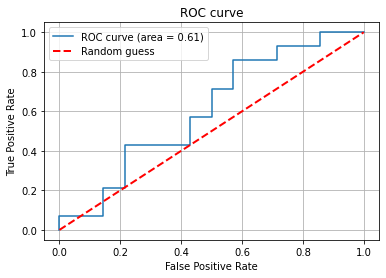

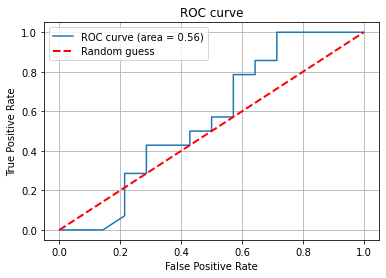

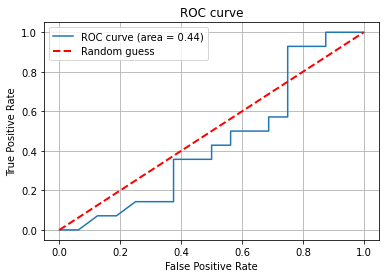

In [116]:
from xgboost import XGBClassifier
xgb=XGBClassifier(scale_pos_weight=20,num_rounds=100)
for i in range(1,6):
    globals()['X_train'+str(i)],globals()['X_test'+str(i)],globals()['y_train'+str(i)],globals()['y_test'+str(i)]=train_test_split(globals()['feature'+str(i)], globals()['clf_label'+str(i)],stratify= globals()['clf_label'+str(i)],test_size=0.2,random_state=20)
    
    globals()['x_re'+str(i)], globals()['y_re'+str(i)]=smote.fit_resample( globals()['X_train'+str(i)], globals()['y_train'+str(i)])
    xgb.fit(globals()['x_re'+str(i)],globals()['y_re'+str(i)])
    globals()['pred'+str(i)]=xgb.predict(globals()['X_test'+str(i)])
    globals()['report'+str(i)]=classification_report(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print(globals()['report'+str(i)])
    globals()['zero_one'+str(i)]=zero_one_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)],normalize=True)
    print(globals()['zero_one'+str(i)])
    globals()['loss'+str(i)]=log_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print(globals()['loss'+str(i)])
    
for i in range(1,6):
    globals()['pred_proba'+str(i)] = xgb.predict_proba(globals()['X_test'+str(i)])
    print(globals()['pred_proba'+str(i)][1:10,])
    
for i in range(1,6):
    globals()['fpr'+str(i)], globals()['tpr'+str(i)], globals()['thresh'+str(i)] = roc_curve(globals()['y_test'+str(i)], globals()['pred_proba'+str(i)][:,1])
    globals()['auc'+str(i)] = metrics.auc(globals()['fpr'+str(i)],  globals()['tpr'+str(i)])
    print("AUC:", globals()['auc'+str(i)])
    
for i in range(1,6):
    plt.plot(globals()['fpr'+str(i)], globals()['tpr'+str(i)],label='ROC curve (area = %.2f)' %globals()['auc'+str(i)])
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='best')
    plt.show()

**ADABoostClassifier**

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        14
           1       0.60      0.56      0.58        16

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.57      0.57      0.57        30

0.43333333333333335
14.966963023947335
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        14
           1       0.50      0.47      0.48        15

    accuracy                           0.48        29
   macro avg       0.48      0.48      0.48        29
weighted avg       0.48      0.48      0.48        29

0.5172413793103448
17.865077348471434
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.79      0.69      0.73        16

    accuracy                           0.71        28
   macro avg       0.71      0.72      0.71        

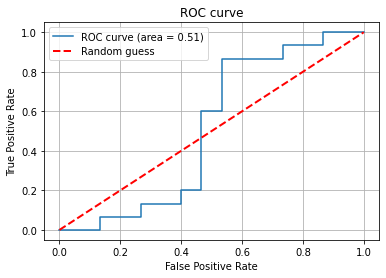

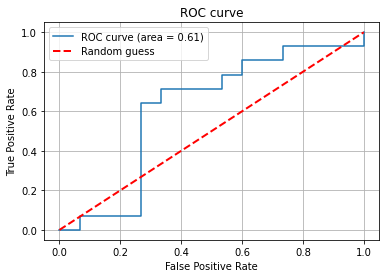

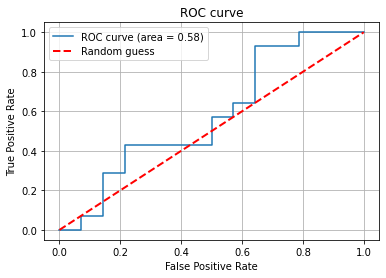

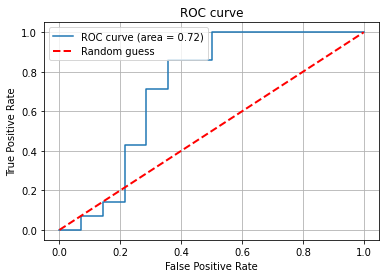

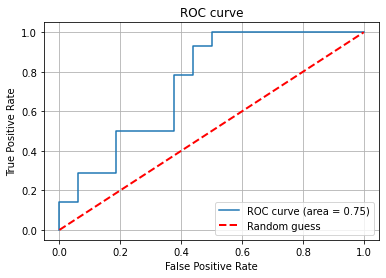

In [107]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=100, random_state=20)
for i in range(1,6):
    globals()['X_train'+str(i)],globals()['X_test'+str(i)],globals()['y_train'+str(i)],globals()['y_test'+str(i)]=train_test_split(globals()['feature'+str(i)], globals()['clf_label'+str(i)],stratify= globals()['clf_label'+str(i)],test_size=0.2,random_state=20)
    
    globals()['x_re'+str(i)], globals()['y_re'+str(i)]=smote.fit_resample( globals()['X_train'+str(i)], globals()['y_train'+str(i)])
    adaboost.fit(globals()['x_re'+str(i)],globals()['y_re'+str(i)])
    globals()['pred'+str(i)]=adaboost.predict(globals()['X_test'+str(i)])
    globals()['report'+str(i)]=classification_report(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print(globals()['report'+str(i)])
    globals()['zero_one'+str(i)]=zero_one_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)],normalize=True)
    print(globals()['zero_one'+str(i)])
    globals()['loss'+str(i)]=log_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print(globals()['loss'+str(i)])
    
for i in range(1,6):
    globals()['pred_proba'+str(i)] = adaboost.predict_proba(globals()['X_test'+str(i)])
    print(globals()['pred_proba'+str(i)][1:10,])
    
for i in range(1,6):
    globals()['fpr'+str(i)], globals()['tpr'+str(i)], globals()['thresh'+str(i)] = roc_curve(globals()['y_test'+str(i)], globals()['pred_proba'+str(i)][:,1])
    globals()['auc'+str(i)] = metrics.auc(globals()['fpr'+str(i)],  globals()['tpr'+str(i)])
    print("AUC:", globals()['auc'+str(i)])
    
for i in range(1,6):
    plt.plot(globals()['fpr'+str(i)], globals()['tpr'+str(i)],label='ROC curve (area = %.2f)' %globals()['auc'+str(i)])
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='best')
    plt.show()

**Support Vector Machine**

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.60      0.60      0.60        15

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.60      0.60      0.60        30

0.4
13.815670477450313
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.64      0.53      0.58        17

    accuracy                           0.55        29
   macro avg       0.55      0.56      0.55        29
weighted avg       0.57      0.55      0.55        29

0.4482758620689655
15.48303762486172
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.71      0.67      0.69        15

    accuracy                           0.68        28
   macro avg       0.68      0.68      0.68        28
weighted avg  

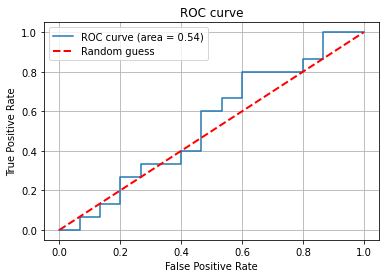

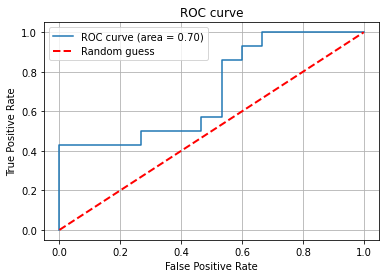

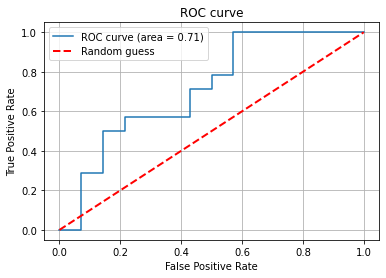

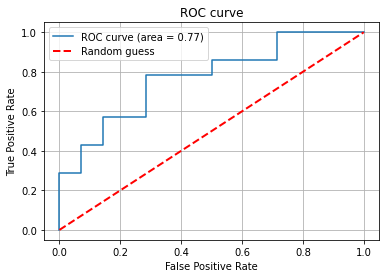

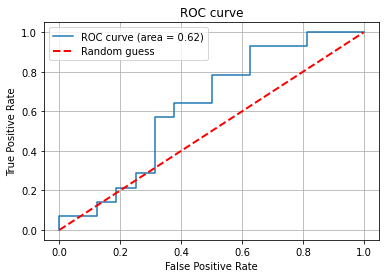

In [108]:
from sklearn.svm import SVC
svc=SVC(class_weight='balanced',probability=True)
for i in range(1,6):
    globals()['X_train'+str(i)],globals()['X_test'+str(i)],globals()['y_train'+str(i)],globals()['y_test'+str(i)]=train_test_split(globals()['feature'+str(i)], globals()['clf_label'+str(i)],stratify= globals()['clf_label'+str(i)],test_size=0.2,random_state=20)
    
    globals()['x_re'+str(i)], globals()['y_re'+str(i)]=smote.fit_resample( globals()['X_train'+str(i)], globals()['y_train'+str(i)])
    svc.fit(globals()['x_re'+str(i)],globals()['y_re'+str(i)])
    globals()['pred'+str(i)]=svc.predict(globals()['X_test'+str(i)])
    globals()['report'+str(i)]=classification_report(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print(globals()['report'+str(i)])
    globals()['zero_one'+str(i)]=zero_one_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)],normalize=True)
    print(globals()['zero_one'+str(i)])
    globals()['loss'+str(i)]=log_loss(globals()['pred'+str(i)],globals()['y_test'+str(i)])
    print(globals()['loss'+str(i)])
    
for i in range(1,6):
    globals()['pred_proba'+str(i)] = svc.predict_proba(globals()['X_test'+str(i)])
    print(globals()['pred_proba'+str(i)][1:10,])
    
for i in range(1,6):
    globals()['fpr'+str(i)], globals()['tpr'+str(i)], globals()['thresh'+str(i)] = roc_curve(globals()['y_test'+str(i)], globals()['pred_proba'+str(i)][:,1])
    globals()['auc'+str(i)] = metrics.auc(globals()['fpr'+str(i)],  globals()['tpr'+str(i)])
    print("AUC:", globals()['auc'+str(i)])
    
for i in range(1,6):
    plt.plot(globals()['fpr'+str(i)], globals()['tpr'+str(i)],label='ROC curve (area = %.2f)' %globals()['auc'+str(i)])
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='best')
    plt.show()